# **DSCI 633 Foundations of Data Science**
*Rochester Institute of Technology*

*Fall 2023*


**Dataset:** [KDD Cup 1999 Data](https://kdd.ics.uci.edu/databases/kddcup99/task.html)

**About the data:** The dataset was part of the 1999 KDD Cup, arranged by ACM's SIGKDD and is the foremost annual competition in Data Mining and Knowledge Discovery, highlighting professionals' talents and innovations in the field.


## **Problem Statement:** *Address the class imbalance in the KDD99 dataset and develop a strong intrusion detection system to accuractely classify between anomalies and normal connections.*


### **Import libraries.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Import Dataset**

In [ ]:
from sklearn.datasets import fetch_kddcup99

In [ ]:
dataset = fetch_kddcup99()
dataset.data

array([[0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
       [0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
       [0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
       ...,
       [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0],
       [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0],
       [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0]], dtype=object)

In [ ]:
X = dataset.data  # Features
y = dataset.target  # Target variable

### **Data Preprocessing.**

In [ ]:
dataset = pd.DataFrame(data = np.c_[X, y], columns = dataset.feature_names + ["target"])

In [ ]:
dataset = dataset.rename(columns= {"target": "attack_type"})

In [ ]:
pd.set_option('display.max_columns', None)
dataset.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'


Check for null values.

In [ ]:
#isna() will check for null values and the sum() will add all the null values for each feature.

dataset.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   duration                     494021 non-null  object
 1   protocol_type                494021 non-null  object
 2   service                      494021 non-null  object
 3   flag                         494021 non-null  object
 4   src_bytes                    494021 non-null  object
 5   dst_bytes                    494021 non-null  object
 6   land                         494021 non-null  object
 7   wrong_fragment               494021 non-null  object
 8   urgent                       494021 non-null  object
 9   hot                          494021 non-null  object
 10  num_failed_logins            494021 non-null  object
 11  logged_in                    494021 non-null  object
 12  num_compromised              494021 non-null  object
 13  root_shell    

We can clearly see that all the datatypes are object.

So we will convert them to their respective datatypes based on the [documentation](https://kdd.ics.uci.edu/databases/kddcup99/task.html).

Convert all the objective data into their respective data types.

In [ ]:
#continouos_cols is a list of all continous dtype columns based on documentation.

continuous_cols = ["duration", "src_bytes", "dst_bytes", "wrong_fragment", "urgent", "hot", "num_failed_logins", "num_compromised", "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate"]
dataset[continuous_cols] = dataset[continuous_cols].apply(pd.to_numeric, errors='coerce')
len(continuous_cols)

32

In [ ]:
#decode string columns from byte string to string.

columns_to_decode = ["protocol_type", "service", "flag", "attack_type"]

def decode_b_to_string(byte_str):
  return byte_str.decode('utf-8')

for i in columns_to_decode:
  dataset[i] = dataset[i].apply(decode_b_to_string)
  dataset[i] = dataset[i].astype('str')


In [ ]:
#discrete_cols is a list of all discrete dtype columns based on documentation.

discrete_cols = ["src_bytes", "dst_bytes", "land", "logged_in", "root_shell", "su_attempted", "is_host_login", "is_guest_login"]
dataset[discrete_cols] = dataset[discrete_cols].apply(pd.to_numeric, errors='coerce')
len(discrete_cols)

8

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

check unique values and counts for each of them.

In [ ]:
dataset.nunique()

duration                        2495
protocol_type                      3
service                           66
flag                              11
src_bytes                       3300
dst_bytes                      10725
land                               2
wrong_fragment                     3
urgent                             4
hot                               22
num_failed_logins                  6
logged_in                          2
num_compromised                   23
root_shell                         2
su_attempted                       3
num_root                          20
num_file_creations                18
num_shells                         3
num_access_files                   7
num_outbound_cmds                  1
is_host_login                      1
is_guest_login                     2
count                            490
srv_count                        470
serror_rate                       92
srv_serror_rate                   51
rerror_rate                       77
s

### **Split the data.**

Here we will use the **training data** for training the model.

Use the **validation data** for hyperparameter tuning and predicting values for the first time.

Use the **testing data** to test the model on completely unseen data.

In [ ]:
#split the data into training, testing and validation data. (70, 15, 15)

from sklearn.model_selection import train_test_split

trainData, tempData = train_test_split(dataset, test_size= 0.3, random_state= 42)
testData, valData = train_test_split(tempData, test_size= 0.5, random_state= 42)

### **Exploratory Data Analysis and Visualisation.**


Perform EDA and visualisation only on the training data.

In [ ]:
trainData.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,345814.000000,3.458140e+05,3.458140e+05,345814.000000,345814.000000,345814.000000,345814.000000,345814.000000,345814.000000,345814.000000,345814.000000,345814.000000,345814.000000,345814.000000,345814.000000,345814.000000,345814.0,345814.0,345814.000000,345814.000000,345814.000000,345814.000000,345814.000000,345814.000000,345814.000000,345814.000000,345814.000000,345814.000000,345814.000000,345814.000000,345814.000000,345814.000000,345814.000000,345814.000000,345814.000000,345814.000000,345814.000000,345814.000000
mean,47.343638,3.671815e+03,8.430714e+02,0.000049,0.006428,0.000020,0.034455,0.000171,0.148082,0.010138,0.000104,0.000038,0.011506,0.001136,0.000104,0.001038,0.0,0.0,0.001408,332.168998,292.709095,0.177331,0.177242,0.057178,0.057488,0.791012,0.020999,0.029070,232.481201,188.547870,0.753410,0.030876,0.601495,0.006668,0.177404,0.177057,0.057884,0.057169
std,696.007371,1.180602e+06,3.082475e+04,0.007011,0.134337,0.006586,0.779755,0.015491,0.355182,1.707032,0.010203,0.008155,1.909044,0.108547,0.010203,0.037203,0.0,0.0,0.037501,213.141203,246.365834,0.381255,0.381545,0.231133,0.231708,0.388592,0.082149,0.142585,64.746723,106.098041,0.410979,0.108944,0.481394,0.042159,0.381134,0.381441,0.230115,0.229669
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,117.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,44.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,510.000000,510.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.151154e+06,1.000000,3.000000,3.000000,30.000000,4.000000,1.000000,884.000000,1.000000,2.000000,993.000000,28.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
trainData.corr()

<ipython-input-17-786dc80a1f97>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  trainData.corr()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.003731,0.004386,-0.000477,-0.003255,0.004604,0.014504,0.006759,-0.017554,0.060487,0.020363,0.060041,0.058764,0.081101,-0.000246,0.027168,NaN,NaN,0.022168,-0.105477,-0.080454,-0.031632,-0.031589,0.007155,0.007212,0.021666,0.053076,-0.011915,0.009969,-0.117451,-0.118460,0.408008,0.042750,-0.006519,-0.030825,-0.030896,0.002002,0.005832
src_bytes,0.003731,1.000000,-0.000010,-0.000022,-0.000142,-0.000007,0.004474,-0.000032,0.001288,0.000102,-0.000024,-0.000011,-0.000012,0.000006,0.000002,-0.000062,NaN,NaN,-0.000090,-0.003309,-0.002735,0.002077,0.001546,0.000807,0.001729,-0.002511,0.007557,-0.000042,-0.001351,-0.003616,-0.002630,0.000737,-0.001018,0.000998,-0.000619,0.001552,-0.000357,0.001713
dst_bytes,0.004386,-0.000010,1.000000,-0.000192,-0.001309,0.020869,0.004713,0.075727,0.052358,0.029453,0.046750,0.105299,0.025697,0.005448,-0.000011,0.009957,NaN,NaN,0.001390,-0.041990,-0.031743,-0.012353,-0.012392,-0.006474,-0.006082,0.014671,-0.006702,0.009439,-0.050391,-0.004896,0.007270,-0.005359,-0.022011,0.009941,-0.012441,-0.012404,-0.004727,-0.005568
land,-0.000477,-0.000022,-0.000192,1.000000,-0.000336,-0.000022,-0.000310,-0.000077,-0.002923,-0.000042,-0.000072,-0.000032,-0.000042,-0.000073,-0.000072,-0.000196,NaN,NaN,-0.000263,-0.010741,-0.008280,0.014405,0.015120,-0.000539,-0.001740,0.002009,0.003630,0.036175,-0.024813,-0.012165,0.001467,0.000133,0.003465,0.077742,0.012720,0.008672,-0.001531,-0.001745
wrong_fragment,-0.003255,-0.000142,-0.001309,-0.000336,1.000000,-0.000147,-0.002114,-0.000527,-0.019951,-0.000284,-0.000488,-0.000221,-0.000288,-0.000501,-0.000488,-0.001335,NaN,NaN,-0.001797,-0.062183,-0.047983,-0.013956,-0.022229,-0.011550,-0.011872,0.017413,-0.007238,0.001170,-0.007580,-0.058476,-0.053986,0.074983,-0.030988,0.014923,-0.018979,-0.022212,0.030572,-0.011911
urgent,0.004604,-0.000007,0.020869,-0.000022,-0.000147,1.000000,0.000427,0.170023,0.007372,0.017987,0.043004,-0.000014,0.011941,0.016148,-0.000031,0.023518,NaN,NaN,-0.000115,-0.004775,-0.003639,-0.001430,-0.001428,-0.000760,-0.000763,0.001653,-0.000786,-0.000627,-0.008533,-0.005421,-0.003914,0.012630,-0.002390,-0.000486,-0.001431,-0.001427,-0.000773,-0.000765
hot,0.014504,0.004474,0.004713,-0.000310,-0.002114,0.000427,1.000000,0.010047,0.105441,0.007984,0.023903,-0.000204,0.001350,0.029193,0.005001,0.002754,NaN,NaN,0.837244,-0.068503,-0.052181,-0.020357,-0.020311,-0.008221,-0.005818,0.022758,-0.002312,0.002215,-0.026333,-0.039300,-0.029628,0.001434,-0.053064,-0.004007,-0.019568,-0.020281,-0.006254,-0.007618
num_failed_logins,0.006759,-0.000032,0.075727,-0.000077,-0.000527,0.170023,0.010047,1.000000,-0.000913,0.010432,0.054776,0.137284,0.004920,0.003324,-0.000112,0.004710,NaN,NaN,-0.000414,-0.017087,-0.013022,-0.003164,-0.004138,0.028772,0.028686,0.004962,0.006274,-0.002245,-0.026684,-0.017294,-0.000764,0.002139,-0.012078,0.001225,-0.001727,-0.002455,0.028631,0.026859
logged_in,-0.017554,0.001288,0.052358,-0.002923,-0.019951,0.007372,0.105441,-0.000913,1.000000,0.014245,0.024474,0.011056,0.014456,0.025112,0.024474,0.066930,NaN,NaN,0.090073,-0.634145,-0.477506,-0.191974,-0.191315,-0.099016,-0.094214,0.219843,-0.072439,0.331526,-0.620982,0.118615,0.160625,-0.060734,-0.460755,0.140388,-0.191235,-0.192022,-0.090651,-0.087556
num_compromised,0.060487,0.000102,0.029453,-0.000042,-0.000284,0.017987,0.007984,0.010432,0.014245,1.000000,0.262612,0.688565,0.992814,0.011845,0.006249,0.398715

This Heatmap depicts the correlation between the different features of the training data.

<ipython-input-18-6d48f1927cf7>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(trainData.corr(), annot=True, cmap='inferno')


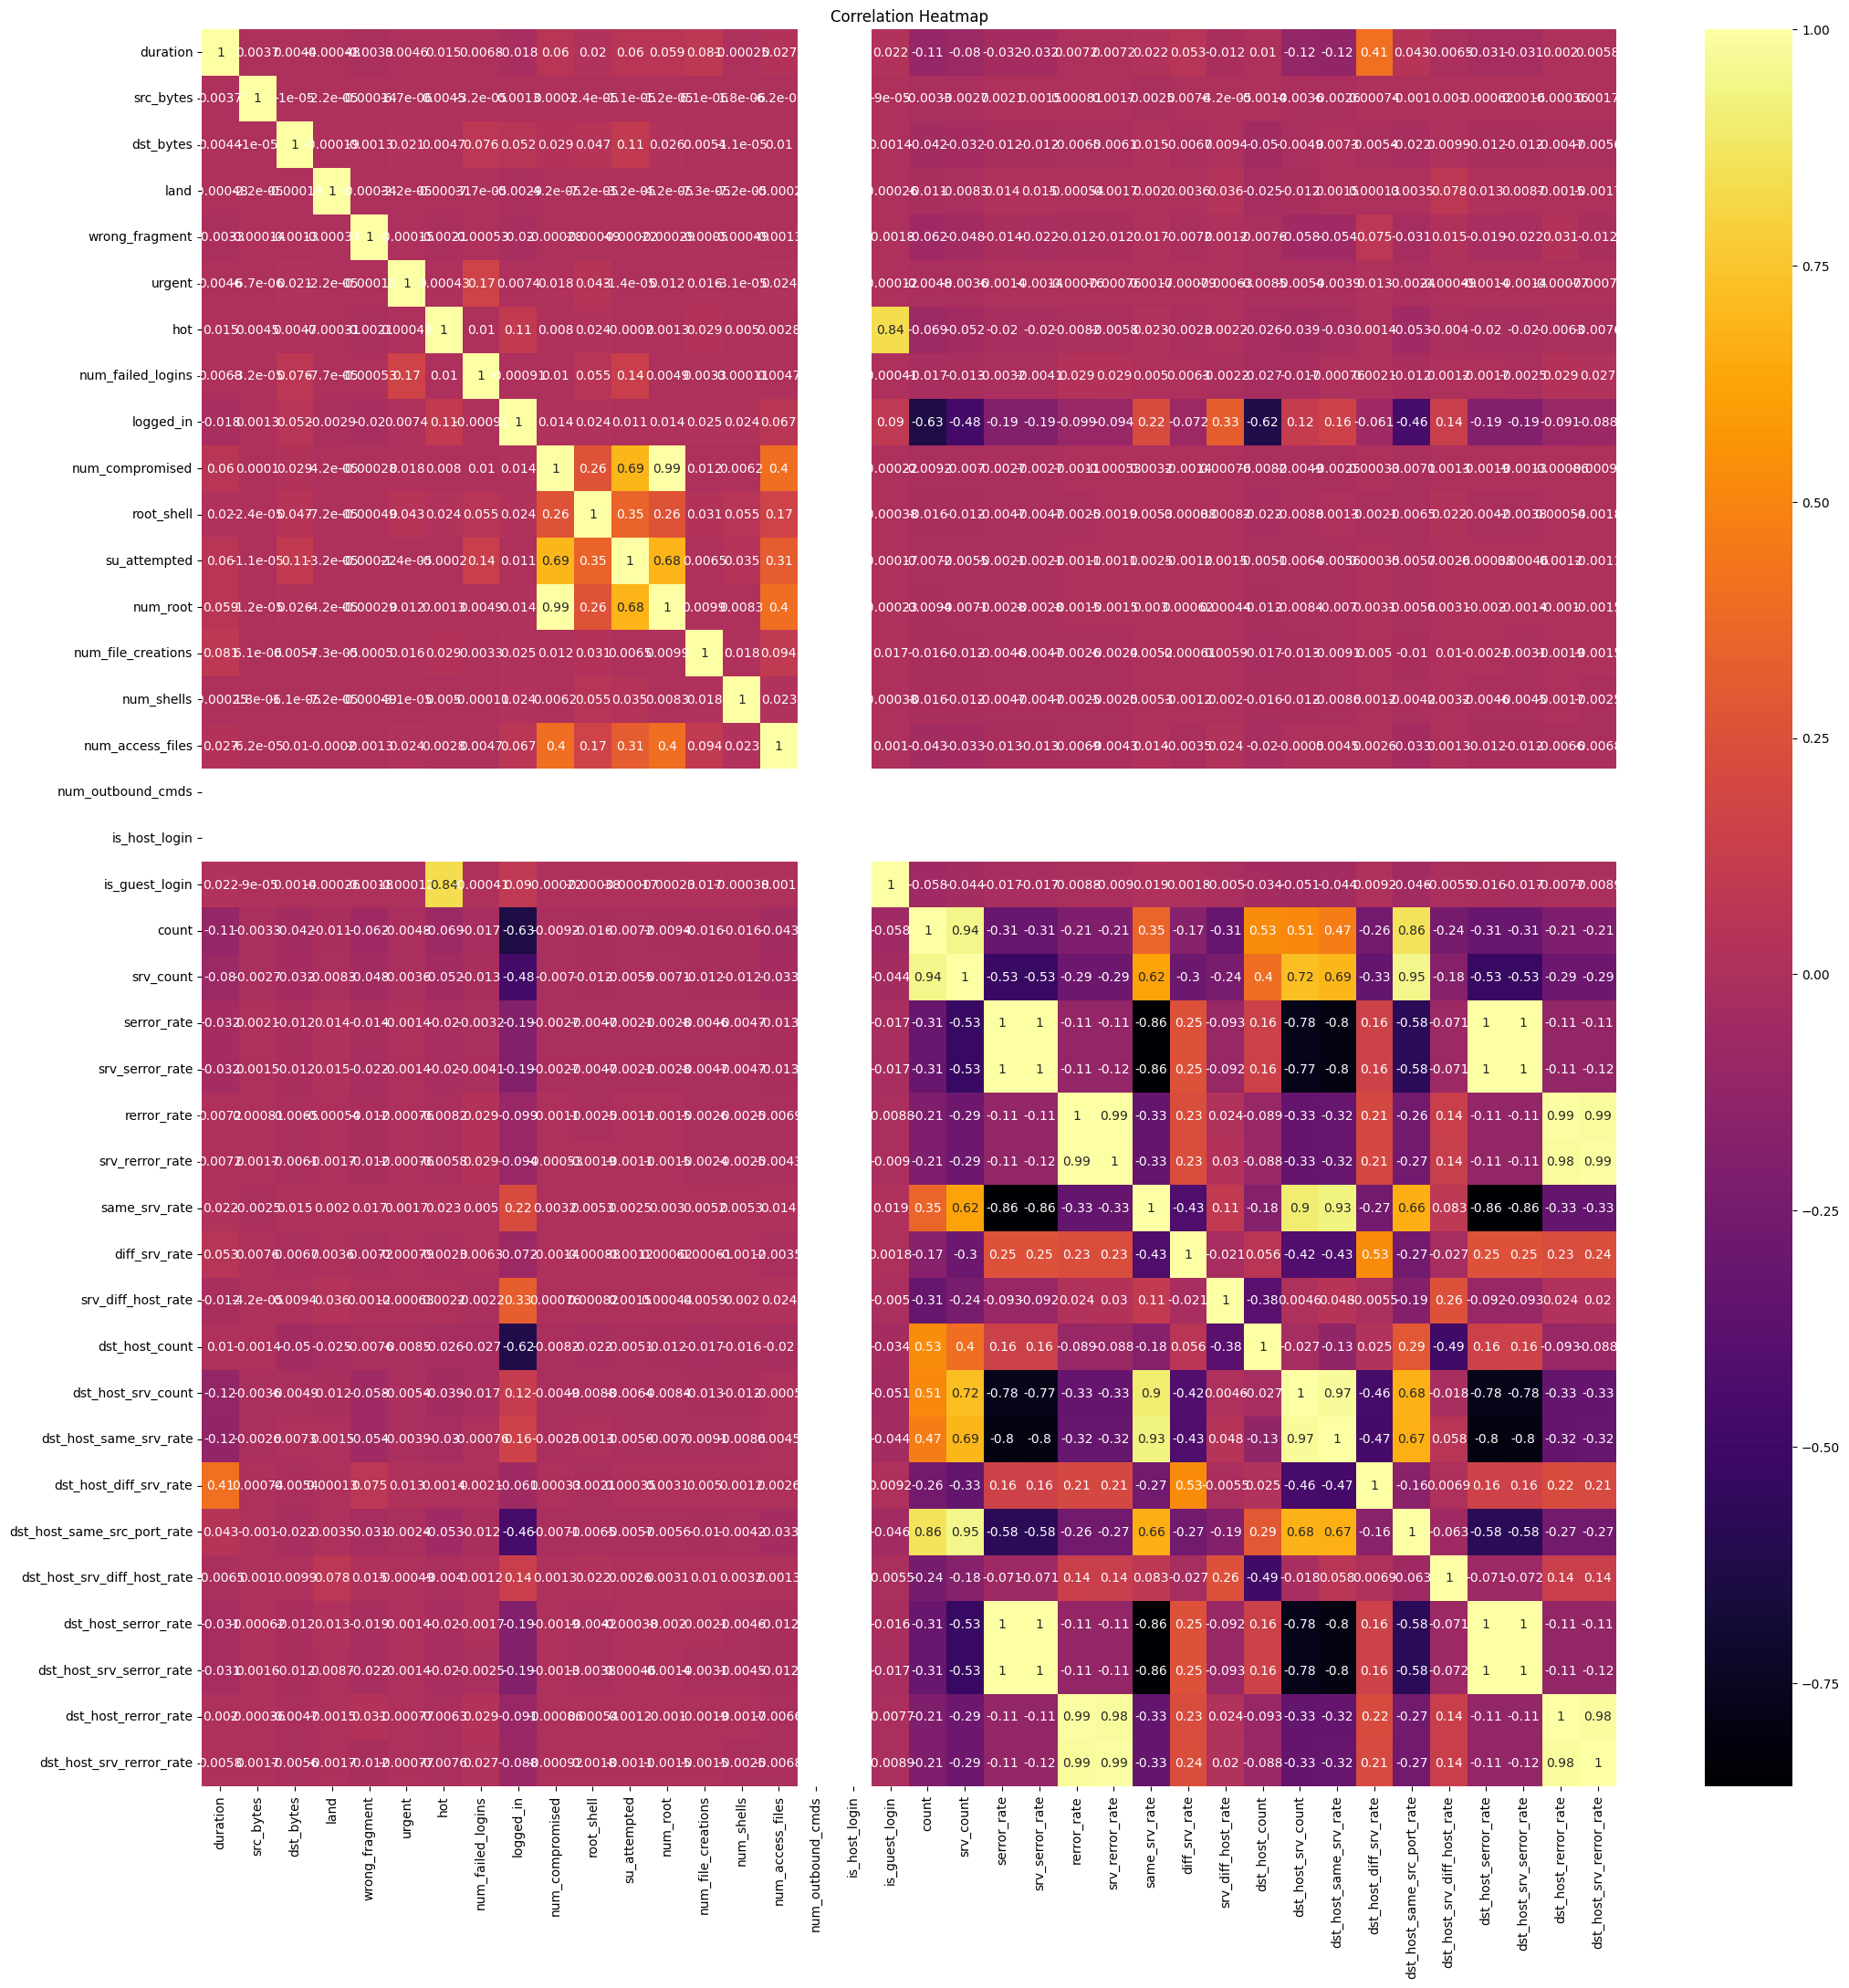

In [ ]:
# We can clearly see 2 columns are redundant and some features are correlated more closely to other features.
# The yellow colour shows maximum correlation between features and as the color gets darker, correlation decreases.

plt.figure(figsize=(25,25))
sns.heatmap(trainData.corr(), annot=True, cmap='inferno')
plt.title('Correlation Heatmap')
plt.show()

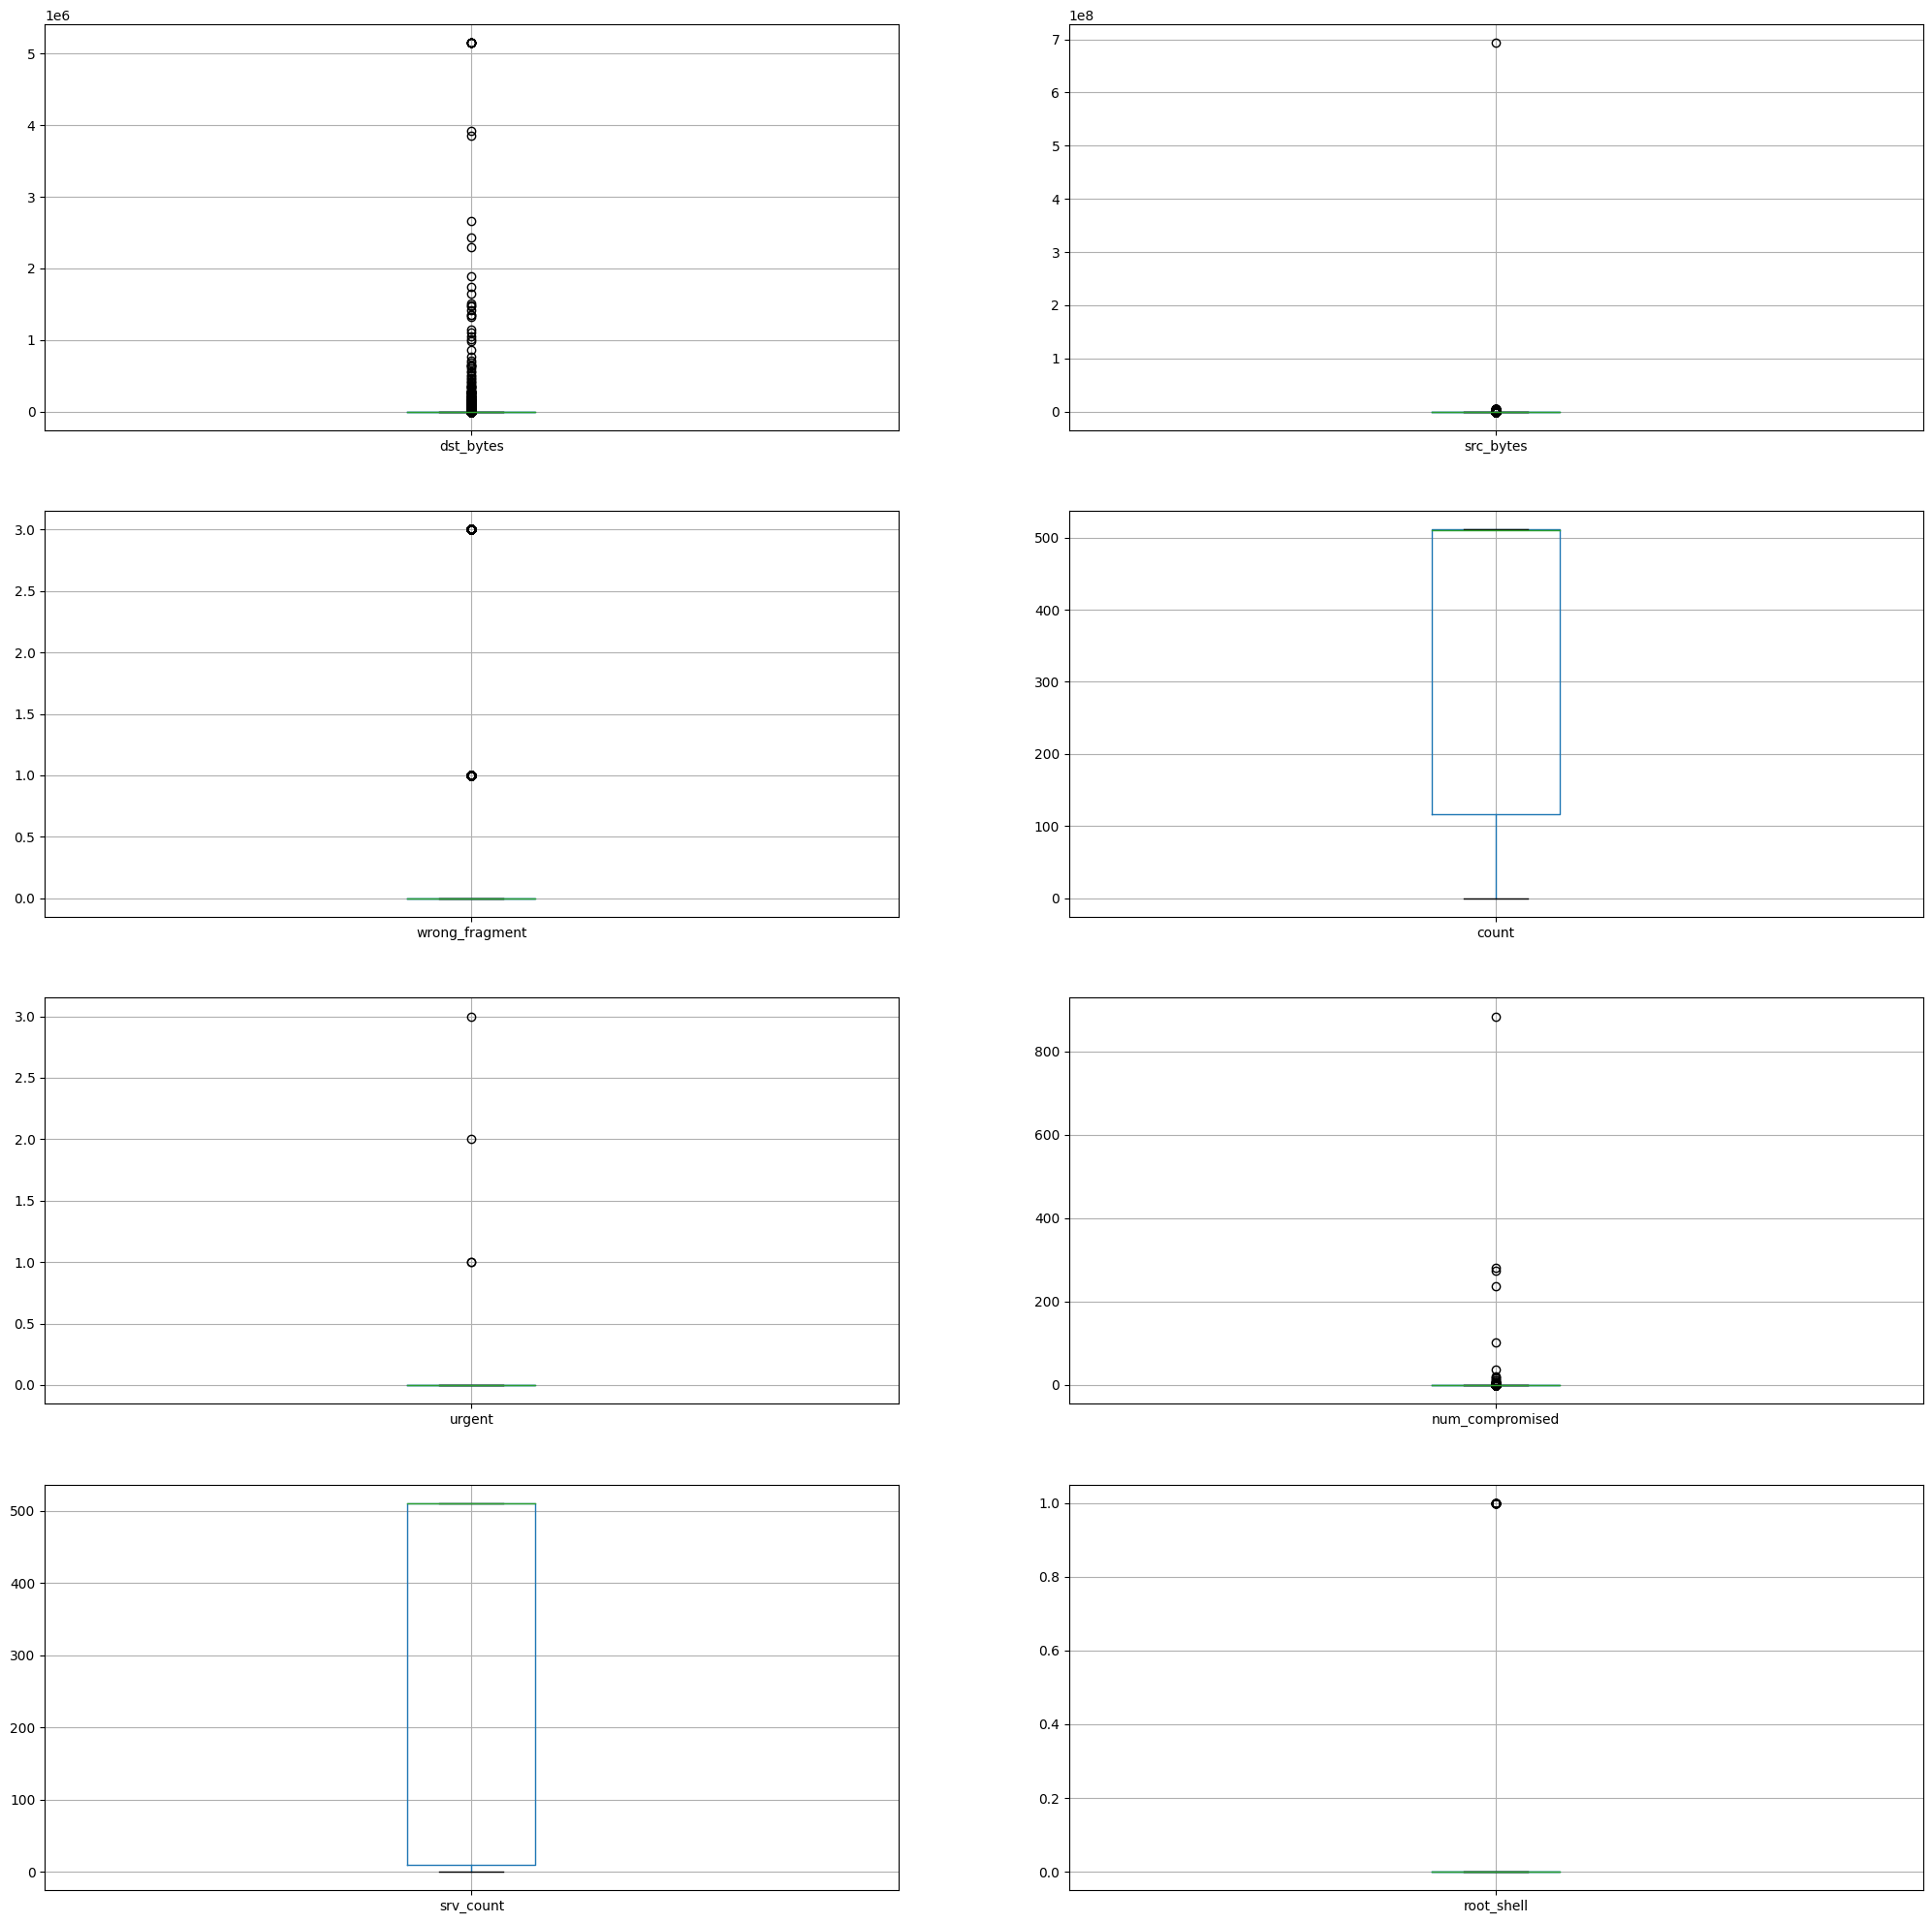

In [ ]:
#boxplot for numeric values.

plt.figure(figsize=(25,25))

plt.subplot(4,2,1)
fig = trainData.boxplot(column='dst_bytes')

plt.subplot(4,2,2)
fig = trainData.boxplot(column='src_bytes')

plt.subplot(4,2,3)
fig = trainData.boxplot(column='wrong_fragment')

plt.subplot(4,2,4)
fig = trainData.boxplot(column='count')

plt.subplot(4,2,5)
fig = trainData.boxplot(column='urgent')

plt.subplot(4,2,6)
fig = trainData.boxplot(column='num_compromised')

plt.subplot(4,2,7)
fig = trainData.boxplot(column='srv_count')

plt.subplot(4,2,8)
fig = trainData.boxplot(column='root_shell')

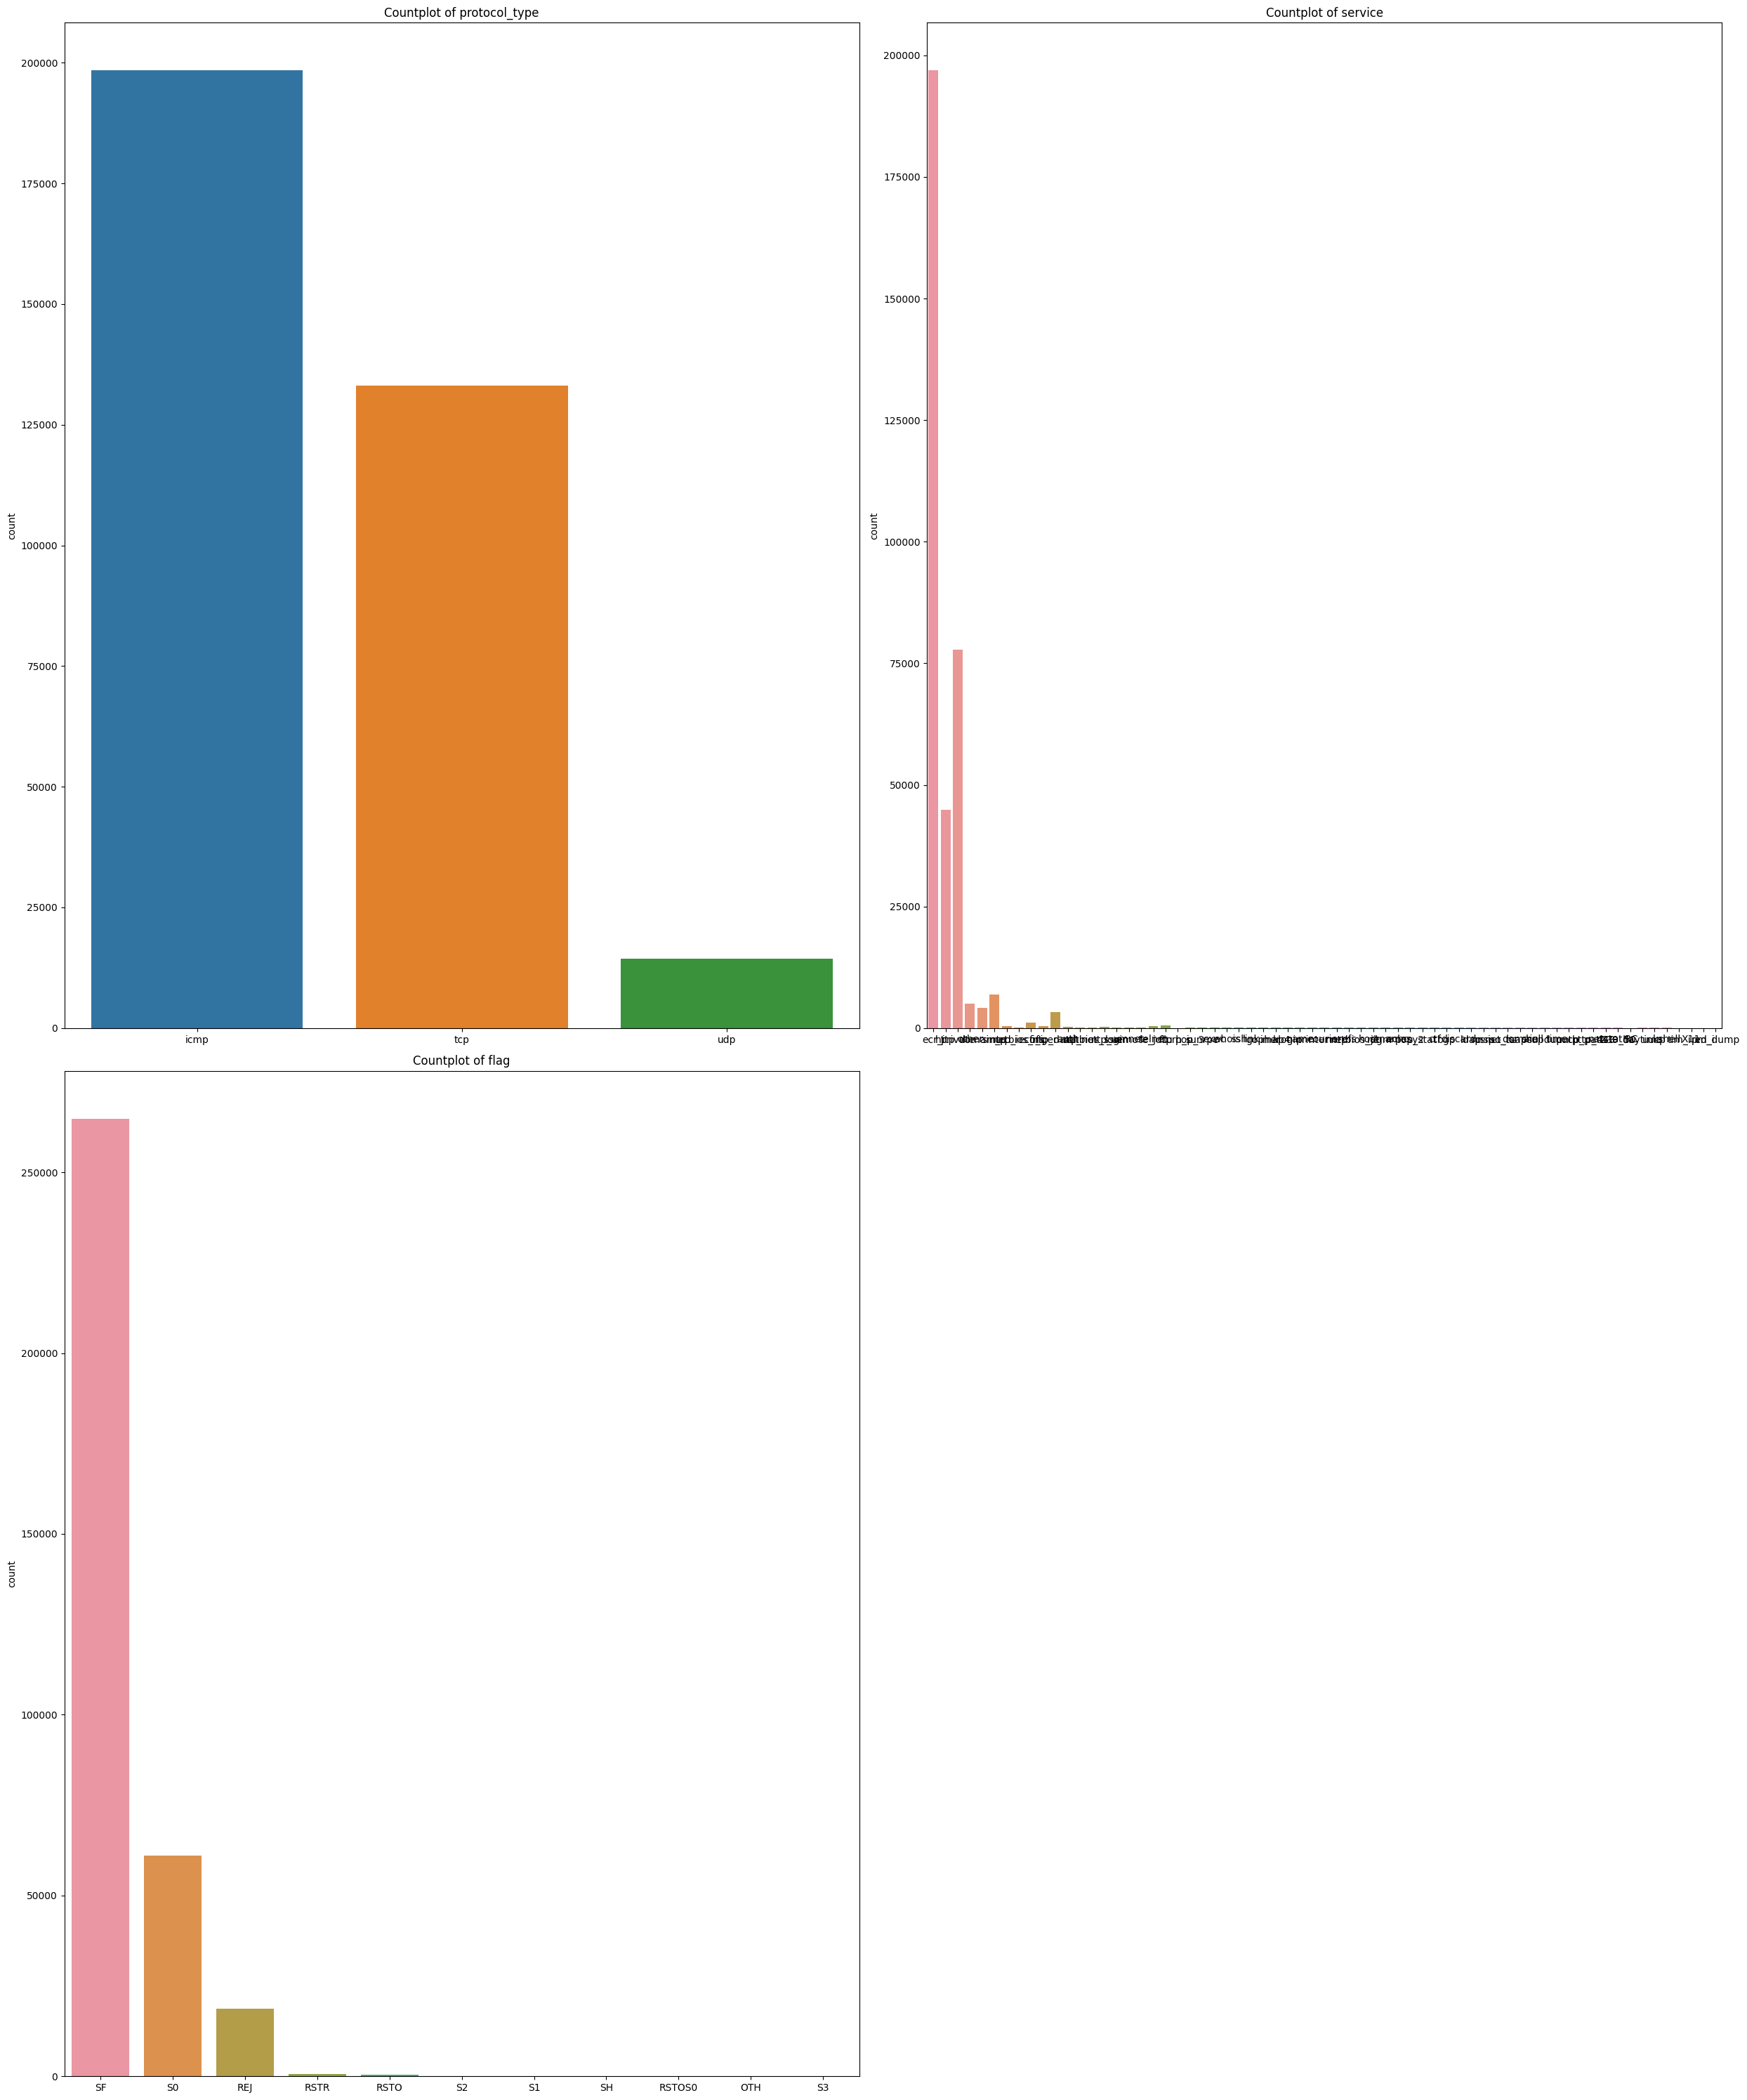

In [ ]:
#visualise the categorical features.

columns_to_visualize = ["protocol_type", "service", "flag"]

# Set up the plot grid
num_plots = len(columns_to_visualize)
num_cols = 2  # Number of columns in the plot grid
num_rows = (num_plots + 1) // num_cols

plt.figure(figsize=(25, 30))

# Create countplots for each specified column
for i, column in enumerate(columns_to_visualize, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=trainData, x=column)
    plt.title(f'Countplot of {column}')
    plt.xlabel('')  # Optionally remove x-axis label for better visualization

plt.tight_layout()
plt.show()

### **Addressing the class imbalance.**

Now the biggest drawback of this version of the data set is the class imbalance in the "attack_type" class.

In the orignal dataset, there were a total of 5 million records and the training data and testing data had different probablitiy distributions too. Some of the attack types were not present in the training data so as to maintain the realisticness of the task.

In my case, I fetched the default data from scikit-learn which has an abnormally low number of certain attack types.


*Here's the distribution in the training and validation data:*

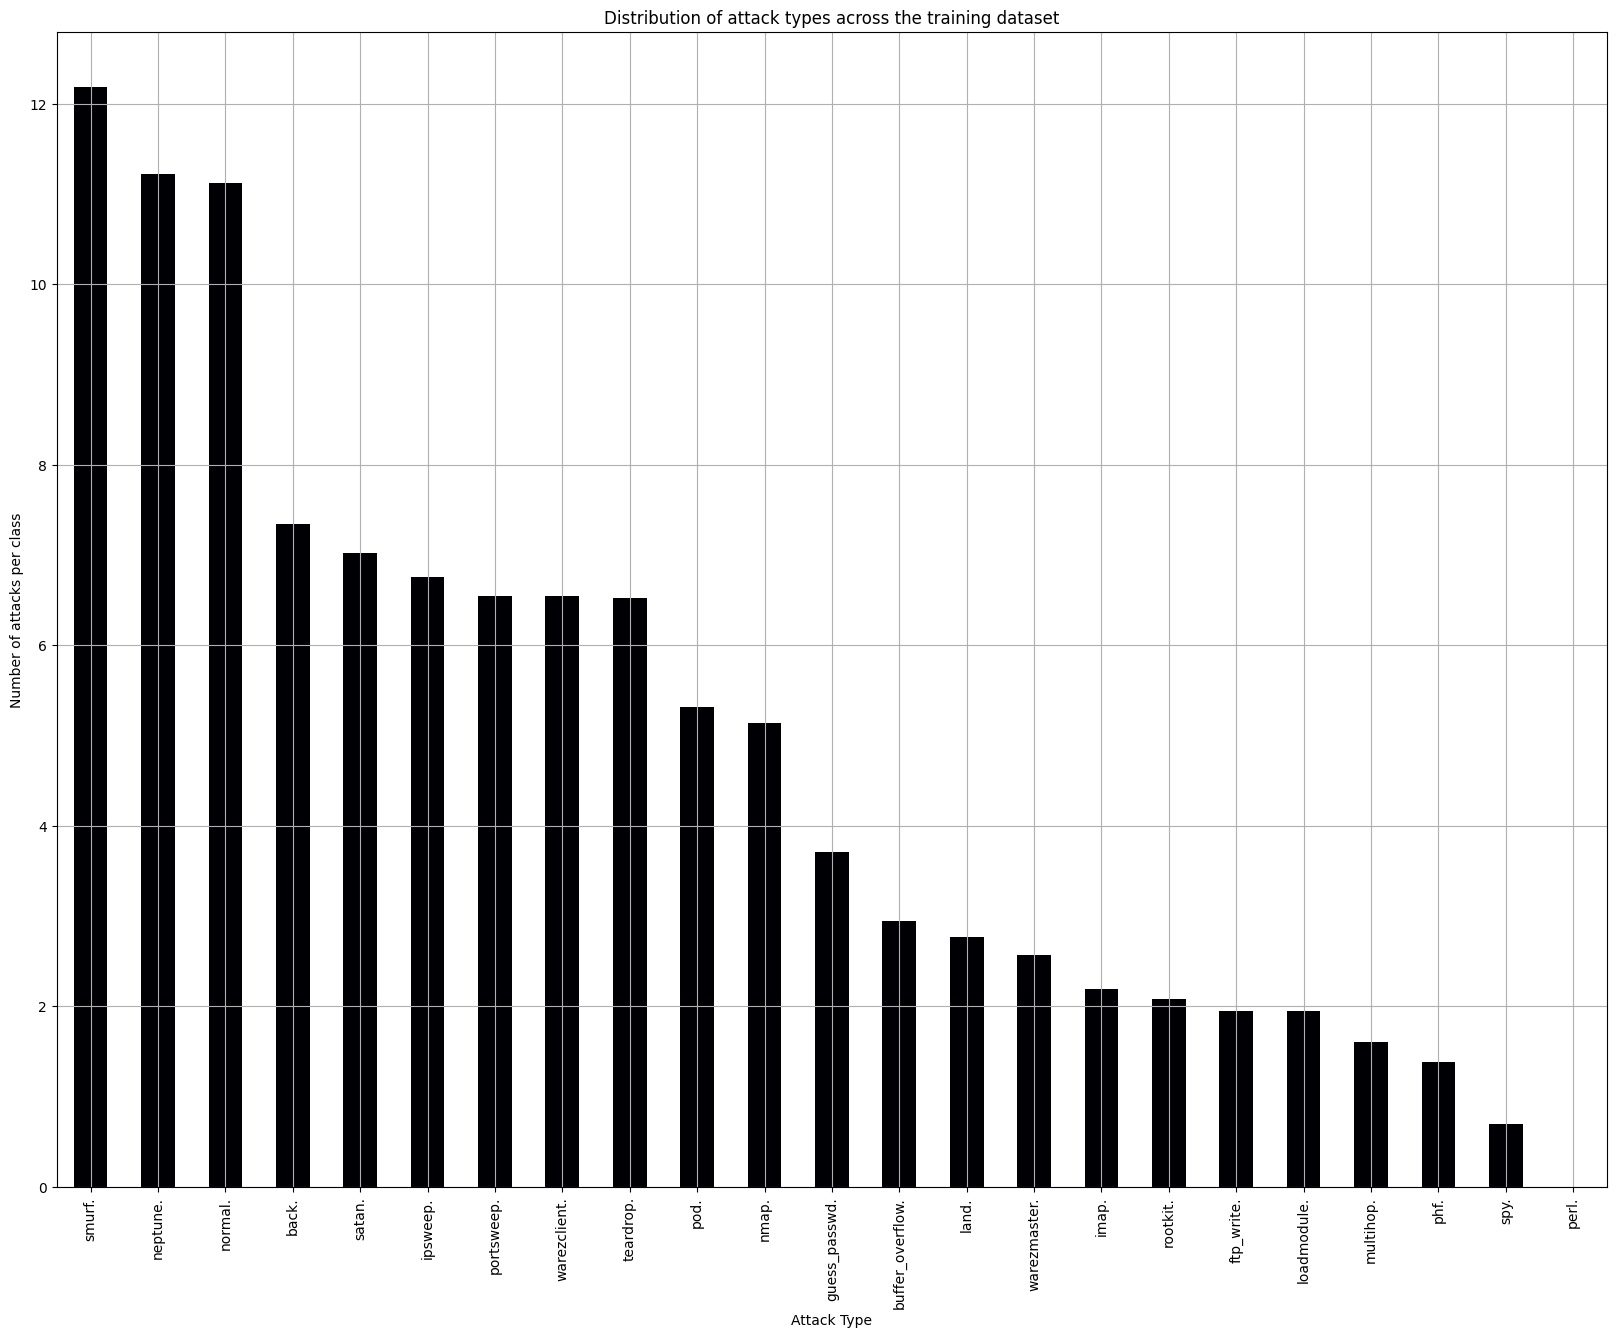

In [ ]:
plt.figure(figsize=(20,15))
class_distribution = trainData["attack_type"].value_counts().apply(np.log)   #to reduce skewness of the data
class_distribution.plot(kind= "bar", cmap= "inferno")
plt.xlabel('Attack Type')
plt.ylabel('Number of attacks per class')
plt.title('Distribution of attack types across the training dataset')
plt.grid()
plt.show()

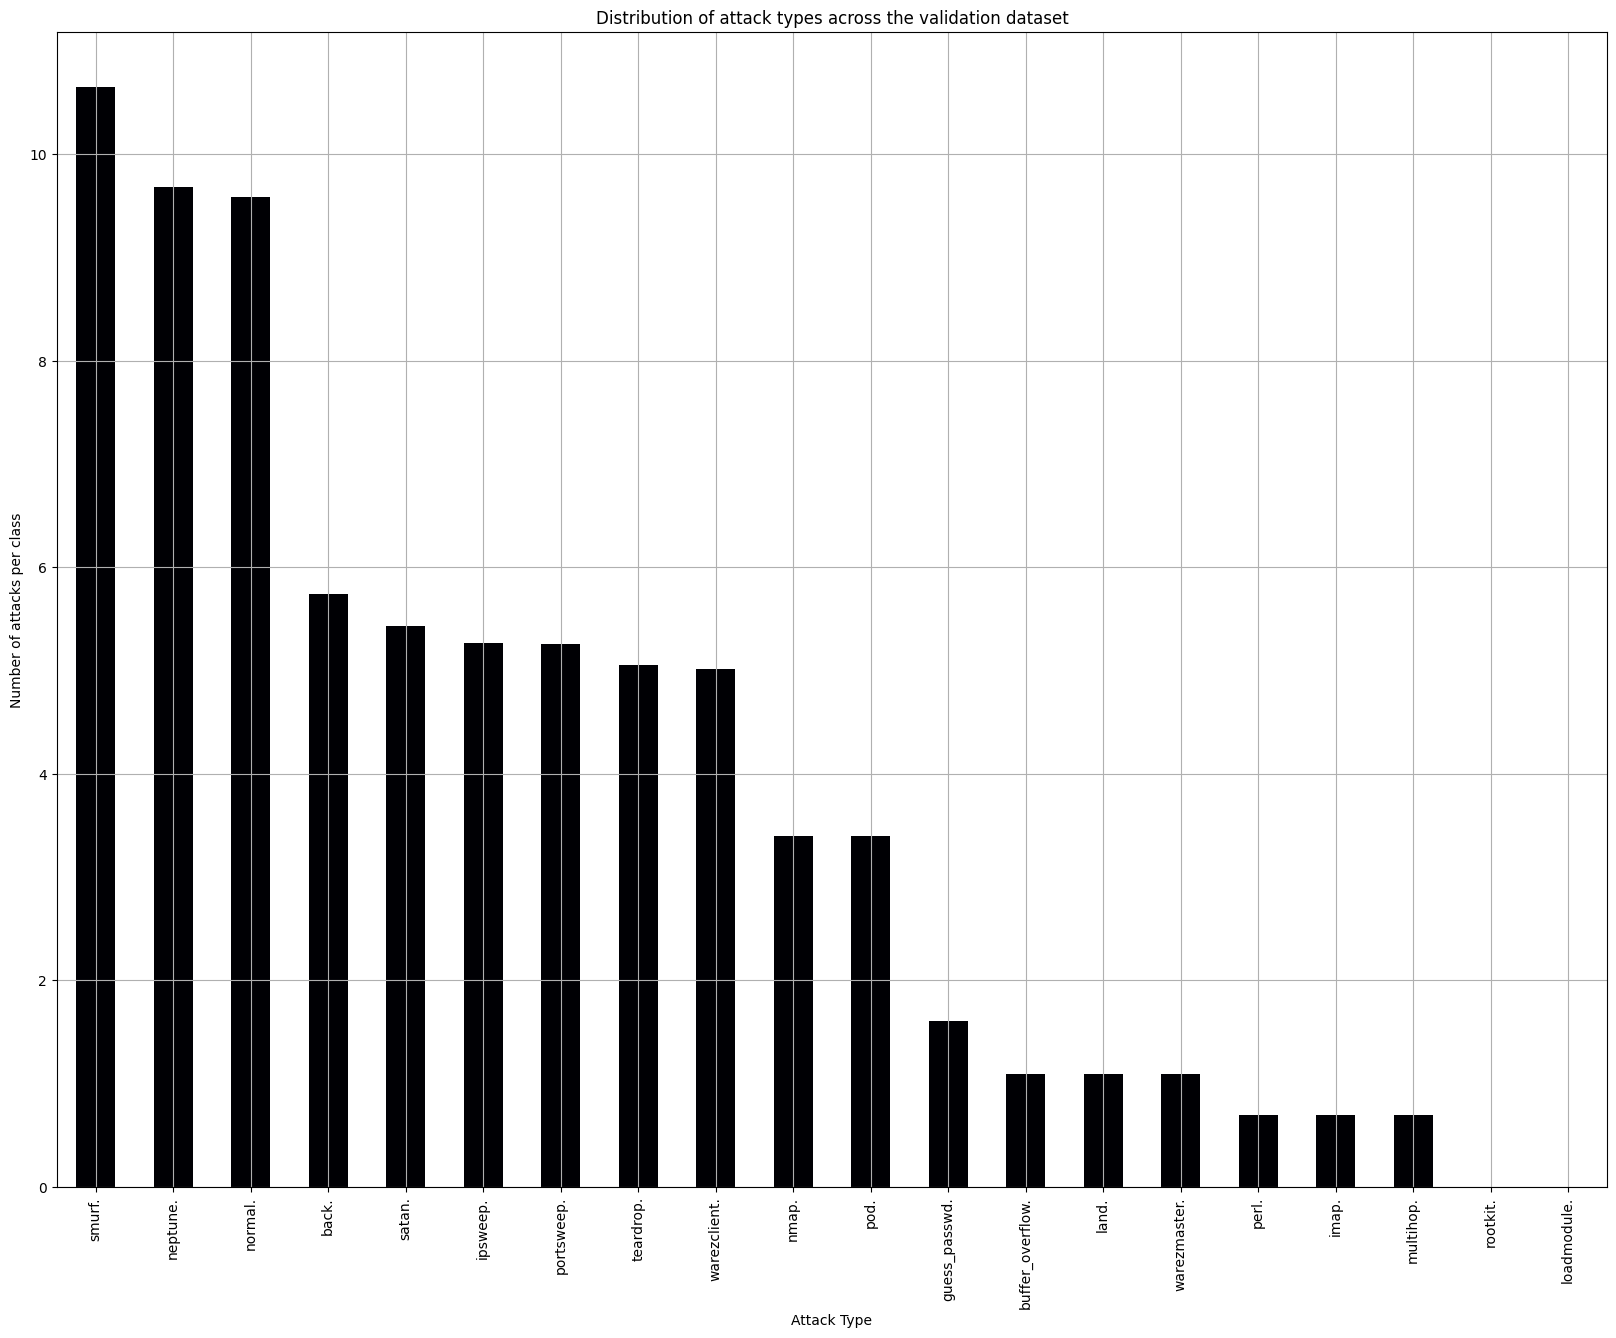

In [ ]:
plt.figure(figsize=(20,15))
class_distribution = valData["attack_type"].value_counts().apply(np.log)   #to reduce skewness of the data
class_distribution.plot(kind= "bar", cmap= "inferno")
plt.xlabel('Attack Type')
plt.ylabel('Number of attacks per class')
plt.title('Distribution of attack types across the validation dataset')
plt.grid()
plt.show()

We can clearly see that even after reducing the skewness with log transform the classes are very imbalanced.

In [ ]:
attackTypesCount = trainData["attack_type"].value_counts()
attackTypesCount.sum()

attackTypesCount.index

for i in range(len(attackTypesCount)):
  print(f"The class {attackTypesCount.index[i].capitalize()} has {attackTypesCount[i]} data points ({np.round((attackTypesCount[i]/attackTypesCount.sum()*100), 3)}%)")

The class Smurf. has 196420 data points (56.799%)
The class Neptune. has 75199 data points (21.746%)
The class Normal. has 68086 data points (19.689%)
The class Back. has 1546 data points (0.447%)
The class Satan. has 1120 data points (0.324%)
The class Ipsweep. has 862 data points (0.249%)
The class Portsweep. has 700 data points (0.202%)
The class Warezclient. has 696 data points (0.201%)
The class Teardrop. has 679 data points (0.196%)
The class Pod. has 204 data points (0.059%)
The class Nmap. has 170 data points (0.049%)
The class Guess_passwd. has 41 data points (0.012%)
The class Buffer_overflow. has 19 data points (0.005%)
The class Land. has 16 data points (0.005%)
The class Warezmaster. has 13 data points (0.004%)
The class Imap. has 9 data points (0.003%)
The class Rootkit. has 8 data points (0.002%)
The class Ftp_write. has 7 data points (0.002%)
The class Loadmodule. has 7 data points (0.002%)
The class Multihop. has 5 data points (0.001%)
The class Phf. has 4 data points 

### **Feature Engineering.**

Before that, let's scale the numerical variables and apply encoding on Object datatypes.

We are using the Robust scaler as the data is prone to outliers*(See the boxplots above)*.


In [ ]:
#select the numeric data from all three splits.

numerictrainData = trainData.select_dtypes(include=["int64", "float64"])
numerictestData = testData.select_dtypes(include=["int64", "float64"])
numericvalData = valData.select_dtypes(include=["int64", "float64"])

numericCols = trainData.select_dtypes(include=["int64", "float64"]).columns
numericCols

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# # Normalize the data
# min_max_scaler = MinMaxScaler()
# trainDataScaled = min_max_scaler.fit_transform(numerictrainData)
# testDataScaled = min_max_scaler.fit_transform(numerictestData)
# valDataScaled = min_max_scaler.fit_transform(numericvalData)

scaler = RobustScaler()
trainDataScaled = scaler.fit_transform(numerictrainData)
testDataScaled = scaler.fit_transform(numerictestData)
valDataScaled = scaler.fit_transform(numericvalData)

In [ ]:
#convert them back to pandas dataframe

trainDataScaled = pd.DataFrame(data= trainDataScaled, columns= numericCols)
testDataScaled = pd.DataFrame(data= testDataScaled, columns= numericCols)
valDataScaled = pd.DataFrame(data= valDataScaled, columns= numericCols)

<Axes: xlabel='duration', ylabel='Count'>

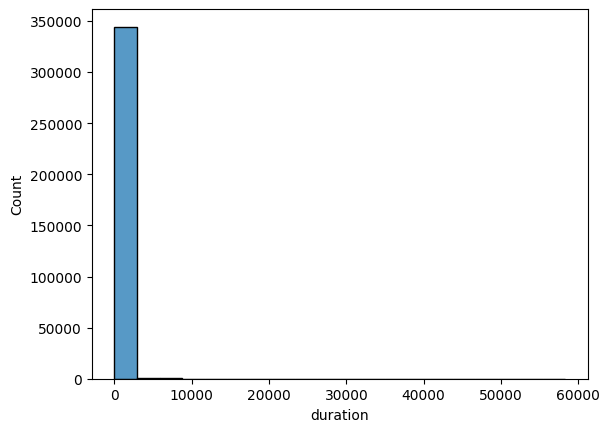

In [ ]:
sns.histplot(data= trainDataScaled, x= "duration")

In [ ]:
testDataScaled

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,-0.527383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.040506,-1.011976,1.0,1.0,0.0,0.0,-0.97,0.07,0.0,0.0,-1.235294,-1.833333,1.50,-1.0,0.0,1.0,1.0,0.0,0.0
1,0.0,-0.527383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.984810,-1.001996,1.0,1.0,0.0,0.0,-0.93,0.07,0.0,0.0,-1.210784,-1.796296,1.50,-1.0,0.0,1.0,1.0,0.0,0.0
2,0.0,-0.420892,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.288608,-1.015968,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,-0.093137,-0.129630,0.25,-1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.519270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002532,0.001996,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.519270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002532,0.001996,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74098,0.0,0.519270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0
74099,0.0,0.519270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002532,0.001996,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0
74100,0.0,-0.527383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.964557,-0.996008,1.0,1.0,0.0,0.0,-0.91,0.05,0.0,0.0,-1.196078,-1.777778,1.50,-1.0,0.0,1.0,1.0,0.0,0.0
74101,0.0,-0.527383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.597468,-1.003992,0.0,0.0,1.0,1.0,-0.97,0.06,0.0,0.0,-1.215686,-1.796296,1.50,-1.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
valDataScaled

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,-0.250253,11670.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.248731,-0.982036,0.0,0.0,0.0,0.0,0.00,0.00,0.0,-237.0,0.000000,0.000000,0.00,-0.94,0.03,0.0,0.0,0.0,0.0
1,0.0,0.518744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002538,0.001996,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.0,0.0
2,0.0,0.518744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002538,0.001996,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.0,0.0
3,0.0,-0.221884,1075.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.284264,-1.009980,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,-0.004808,0.000000,0.25,-1.00,0.00,0.0,0.0,0.0,0.0
4,0.0,-0.526849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.591371,-0.994012,1.0,1.0,0.0,0.0,-0.96,0.06,0.0,0.0,-1.168269,-1.583333,2.00,-1.00,0.00,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74099,0.0,-0.526849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.002538,-1.009980,1.0,1.0,0.0,0.0,-0.97,0.07,0.0,0.0,-1.206731,-1.633333,1.50,-1.00,0.00,1.0,1.0,0.0,0.0
74100,0.0,0.518744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002538,0.001996,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.0,0.0
74101,0.0,0.518744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002538,0.001996,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.0,0.0
74102,0.0,0.518744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.005076,-0.003992,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.0,0.0


Coming back to class imbalance: We can clearly see from the graph that there is a high imbalance in the attack_type taget variable.

There are three main approaches to handle the class imbalance:

1. Convert the attack type into a binary class of ***'NORMAL'*** & ***'ANOMALY'***.

*   This method is actually the best approach as it gives the model a more comprehensive target to predict. Moreover, in real world scenarios, apart from developers and white-hat hackers, nobody actually cares what kind of attack is hacking their system. They only care whether it's actually a normal connection or an anomaly.

2. Convert the attack types into sub classes depicting all different kinds of attacks and 1 normal class.: ***NORMAL, DOS, PROBE, R2L, U2R***.

3. Perform oversampling directly using a combination of ***SMOTE*** and ***Random Oversampling.***


We will try to go on with the 1st method in this situation i.e. ***converting the target variable into a binary classification***.

In [ ]:
trainData["attack_type"].value_counts()

smurf.              196420
neptune.             75199
normal.              68086
back.                 1546
satan.                1120
ipsweep.               862
portsweep.             700
warezclient.           696
teardrop.              679
pod.                   204
nmap.                  170
guess_passwd.           41
buffer_overflow.        19
land.                   16
warezmaster.            13
imap.                    9
rootkit.                 8
ftp_write.               7
loadmodule.              7
multihop.                5
phf.                     4
spy.                     2
perl.                    1
Name: attack_type, dtype: int64

In [ ]:
trainData["attack_type"].unique()

array(['smurf.', 'normal.', 'neptune.', 'satan.', 'back.', 'portsweep.',
       'teardrop.', 'ipsweep.', 'warezclient.', 'pod.', 'guess_passwd.',
       'nmap.', 'land.', 'buffer_overflow.', 'ftp_write.', 'rootkit.',
       'phf.', 'imap.', 'warezmaster.', 'loadmodule.', 'multihop.',
       'spy.', 'perl.'], dtype=object)

In [ ]:
trainData["attack_type"] = trainData["attack_type"].str.rstrip('.')
testData["attack_type"] = testData["attack_type"].str.rstrip('.')
valData["attack_type"] = valData["attack_type"].str.rstrip('.')

In [ ]:
trainData["attack_type"].unique()

array(['smurf', 'normal', 'neptune', 'satan', 'back', 'portsweep',
       'teardrop', 'ipsweep', 'warezclient', 'pod', 'guess_passwd',
       'nmap', 'land', 'buffer_overflow', 'ftp_write', 'rootkit', 'phf',
       'imap', 'warezmaster', 'loadmodule', 'multihop', 'spy', 'perl'],
      dtype=object)

In [ ]:
class_mapping = {
    'back': 'ANOMALY', 'buffer_overflow': 'ANOMALY', 'ftp_write': 'ANOMALY', 'guess_passwd': 'ANOMALY',
    'imap': 'ANOMALY', 'ipsweep': 'ANOMALY', 'land': 'ANOMALY', 'loadmodule': 'ANOMALY', 'multihop': 'ANOMALY',
    'neptune': 'ANOMALY', 'nmap': 'ANOMALY', 'perl': 'ANOMALY', 'phf': 'ANOMALY', 'pod': 'ANOMALY',
    'portsweep': 'ANOMALY', 'rootkit': 'ANOMALY', 'satan': 'ANOMALY', 'smurf': 'ANOMALY',
    'spy': 'ANOMALY', 'teardrop': 'ANOMALY', 'warezclient': 'ANOMALY', 'warezmaster': 'ANOMALY',
    'normal': 'NORMAL'
}

# Map the original classes to the smaller classes using the mapping dictionary
trainData["attack_type"] = trainData["attack_type"].map(class_mapping)

trainData["attack_type"].value_counts()

ANOMALY    277728
NORMAL      68086
Name: attack_type, dtype: int64

In [ ]:
testData["attack_type"] = testData["attack_type"].map(class_mapping)

testData["attack_type"].value_counts()

ANOMALY    59404
NORMAL     14699
Name: attack_type, dtype: int64

In [ ]:
valData["attack_type"] = valData["attack_type"].map(class_mapping)

valData["attack_type"].value_counts()

ANOMALY    59611
NORMAL     14493
Name: attack_type, dtype: int64

Now perform encoding using Label Encoder.

In [ ]:
trainStrings = trainData.select_dtypes(include= 'object')
testStrings = testData.select_dtypes(include= 'object')
valStrings = valData.select_dtypes(include= 'object')

stringCols = trainData.select_dtypes(include= 'object').columns
stringCols

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

trainEncoded = trainStrings.apply(encoder.fit_transform)
testEncoded = testStrings.apply(encoder.fit_transform)
valEncoded = valStrings.apply(encoder.fit_transform)

important step

In [ ]:
trainData = pd.concat([trainDataScaled.reset_index(drop=True), trainEncoded.reset_index(drop=True)], axis=1)

In [ ]:
trainData

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,attack_type
0,0.0,0.518219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002538,0.001996,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0,14,9,0
1,0.0,-0.275304,3415.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.291878,-1.015968,0.0,0.0,0.0,0.0,0.00,0.00,0.0,-223.0,0.000000,0.000000,0.00,-0.97,0.06,0.0,0.0,0.09,0.04,1,22,9,1
2,0.0,0.518219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0,14,9,0
3,0.0,-0.526316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.680203,-0.992016,1.0,1.0,0.0,0.0,-0.95,0.07,0.0,0.0,-1.146919,-1.583333,1.75,-1.00,0.00,1.0,1.0,0.00,0.00,1,45,5,0
4,0.0,-0.526316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.758883,-1.003992,0.0,0.0,1.0,1.0,-0.97,0.07,0.0,0.0,-1.175355,-1.616667,2.00,-1.00,0.00,0.0,0.0,1.00,1.00,1,45,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345809,0.0,0.518219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002538,0.001996,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0,14,9,0
345810,0.0,-0.526316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.027919,-1.007984,1.0,1.0,0.0,0.0,-0.95,0.07,0.0,0.0,-1.170616,-1.616667,1.50,-1.00,0.00,1.0,1.0,0.00,0.00,1,45,5,0
345811,0.0,0.518219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002538,0.001996,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0,14,9,0
345812,9141.0,-0.377530,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.291878,-1.015968,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,-1.194313,-1.650000,10.25,-0.16,0.00,0.0,0.0,0.00,0.00,2,40,9,1


In [ ]:
testData = pd.concat([testDataScaled.reset_index(drop=True), testEncoded.reset_index(drop=True)], axis=1)

In [ ]:
testData

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,attack_type
0,0.0,-0.527383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.040506,-1.011976,1.0,1.0,0.0,0.0,-0.97,0.07,0.0,0.0,-1.235294,-1.833333,1.50,-1.0,0.0,1.0,1.0,0.0,0.0,1,37,5,0
1,0.0,-0.527383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.984810,-1.001996,1.0,1.0,0.0,0.0,-0.93,0.07,0.0,0.0,-1.210784,-1.796296,1.50,-1.0,0.0,1.0,1.0,0.0,0.0,1,44,5,0
2,0.0,-0.420892,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.288608,-1.015968,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,-0.093137,-0.129630,0.25,-1.0,0.0,0.0,0.0,0.0,0.0,2,44,9,1
3,0.0,0.519270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002532,0.001996,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,14,9,0
4,0.0,0.519270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002532,0.001996,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,14,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74098,0.0,0.519270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,14,9,0
74099,0.0,0.519270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002532,0.001996,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,14,9,0
74100,0.0,-0.527383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.964557,-0.996008,1.0,1.0,0.0,0.0,-0.91,0.05,0.0,0.0,-1.196078,-1.777778,1.50,-1.0,0.0,1.0,1.0,0.0,0.0,1,44,5,0
74101,0.0,-0.527383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.597468,-1.003992,0.0,0.0,1.0,1.0,-0.97,0.06,0.0,0.0,-1.215686,-1.796296,1.50,-1.0,0.0,0.0,0.0,1.0,1.0,1,44,1,0


In [ ]:
valData = pd.concat([valDataScaled.reset_index(drop=True), valEncoded.reset_index(drop=True)], axis=1)

In [ ]:
valData

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,attack_type
0,0.0,-0.250253,11670.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.248731,-0.982036,0.0,0.0,0.0,0.0,0.00,0.00,0.0,-237.0,0.000000,0.000000,0.00,-0.94,0.03,0.0,0.0,0.0,0.0,1,22,8,1
1,0.0,0.518744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002538,0.001996,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,14,8,0
2,0.0,0.518744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002538,0.001996,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,14,8,0
3,0.0,-0.221884,1075.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.284264,-1.009980,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,-0.004808,0.000000,0.25,-1.00,0.00,0.0,0.0,0.0,0.0,1,22,8,1
4,0.0,-0.526849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.591371,-0.994012,1.0,1.0,0.0,0.0,-0.96,0.06,0.0,0.0,-1.168269,-1.583333,2.00,-1.00,0.00,1.0,1.0,0.0,0.0,1,44,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74099,0.0,-0.526849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.002538,-1.009980,1.0,1.0,0.0,0.0,-0.97,0.07,0.0,0.0,-1.206731,-1.633333,1.50,-1.00,0.00,1.0,1.0,0.0,0.0,1,44,4,0
74100,0.0,0.518744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002538,0.001996,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,14,8,0
74101,0.0,0.518744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002538,0.001996,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,14,8,0
74102,0.0,0.518744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.005076,-0.003992,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,14,8,0


Now that we have preprocessed our data, we need to remove the redundant columns: ***num_outbound_cmds, is_host_login***.

In [ ]:
trainData = trainData.drop(columns= ["num_outbound_cmds", "is_host_login"], axis= 1)
testData = testData.drop(columns= ["num_outbound_cmds", "is_host_login"], axis= 1)
valData = valData.drop(columns= ["num_outbound_cmds", "is_host_login"], axis= 1)

Break the data into X and y.

In [ ]:
X_train = trainData.iloc[:, :-1]
y_train = trainData.iloc[:, -1]

X_test = testData.iloc[:, :-1]
y_test = testData.iloc[:, -1]

X_val = valData.iloc[:, :-1]
y_val = valData.iloc[:, -1]

In [ ]:
y_train.unique()

array([0, 1])

### **Feature selection experiment.**

Firstly, for conducting the feature selection and PCA experiment, we need to see how a model performs when we consider all the features.

We will then compare it to the results after applying PCA/Feature Selection.

`The goal of this experiment is reduce the overfitting it might cause on the training data.`

**Hypothesis:** Feature reduction will improve performance and avoid overfitting.

For this experiment, we will choose the ***Random Forest Classifier*** as it is one of the most commonly used model for imbalanced datasets.

In [ ]:
#run the model without any hyperparameter tuning or reduced number of features.

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs= -1, n_estimators= 50)

rfc.fit(X_train, y_train) #training the model using normal data

y_predRFC = rfc.predict(X_val)  #predict on validation data

In [ ]:
from sklearn.metrics import accuracy_score

raw_training_accuracy = accuracy_score(y_train, rfc.predict(X_train))
print(f"The training score of the model is: {raw_training_accuracy*100}%")

from sklearn.metrics import accuracy_score

rfc_val_accuracy = accuracy_score(y_val, y_predRFC)

print(f"The accuracy on validation data without hyperparameter tuning for classifying the connections using RandomForestClassifier is: {rfc_val_accuracy*100}%")

The training score of the model is: 99.99971082720769%
The accuracy on validation data without hyperparameter tuning for classifying the connections using RandomForestClassifier is: 99.97301090359495%


Now check the accuracy on unseen testing data:

In [ ]:
y_pred_testRFC = rfc.predict(X_test)

rfc_test_accuracy = accuracy_score(y_test, y_pred_testRFC)

print(f"The accuracy on testing data without hyperparameter tuning for classifying the connections using RandomForestClassifier is: {rfc_test_accuracy*100}%")

The accuracy on testing data without hyperparameter tuning for classifying the connections using RandomForestClassifier is: 99.98245685059985%


Perform Feature Selection to reduce dimensionality.

In [ ]:
rfc2 = RandomForestClassifier(n_jobs= -1, n_estimators= 50)


from sklearn.feature_selection import SelectKBest, f_classif

featureSelector = SelectKBest(score_func= f_classif, k= 20)

X_trainSelected = featureSelector.fit_transform(X_train, y_train)

X_testSelected = featureSelector.transform(X_test)

X_valSelected = featureSelector.transform(X_val)

selected_features_indices = featureSelector.get_support(indices=True)

# Get the selected feature names (assuming X_train is a DataFrame)
selected_feature_names = trainData.columns[selected_features_indices]

In [ ]:
selected_feature_names

Index(['duration', 'logged_in', 'num_access_files', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'protocol_type', 'service', 'flag'],
      dtype='object')

In [ ]:
X_trainSelected = pd.DataFrame(data= X_trainSelected, columns= selected_feature_names)
X_testSelected = pd.DataFrame(data= X_testSelected, columns= selected_feature_names)
X_valSelected = pd.DataFrame(data= X_valSelected, columns= selected_feature_names)

In [ ]:
#using the selected features to train the RFC.

rfc2.fit(X_trainSelected, y_train)

y_pred_selectedRFC = rfc2.predict(X_valSelected)

raw_selected_training_accuracy = rfc2.score(X_trainSelected, y_train)
print(f"The training score of the model is: {raw_selected_training_accuracy*100}%")

from sklearn.metrics import accuracy_score

rfc_raw_accuracy_selected = accuracy_score(y_val, y_pred_selectedRFC)

print(f"The accuracy on the validation data after feature selection for classifying the connections using RandomForestClassifier is: {rfc_raw_accuracy_selected*100}%")

The training score of the model is: 99.7449495971823%
The accuracy on the validation data after feature selection for classifying the connections using RandomForestClassifier is: 99.54523372557486%


now checking on testing data.

In [ ]:
y_pred_selectedRFC_testData = rfc2.predict(X_testSelected)

rfc_test_accuracy_selected = accuracy_score(y_test, y_pred_selectedRFC_testData)

print(f"The accuracy on the testing data after feature selection for classifying the connections using RandomForestClassifier is: {rfc_test_accuracy_selected*100}%")

The accuracy on the testing data after feature selection for classifying the connections using RandomForestClassifier is: 99.64913701199681%


***Post-development Note:*** A very intersting thing to note here is that the model perform way worse when we used Standard Scaler as compared to the Robust Scaler.

As our data was not on the same scale in every feature and had multiple outliers using a Robust Scaler proved to be a more successful endeavor. It could handle outliers effieciently providing higher accuracies on both training and testing data.

Preserving Shape: It aims to maintain the relative relationships and distribution shape of the features while reducing the influence of outliers.

### **Data Augmentation to fix class imbalance.**

We are applying oversampling only to training dataset and not on the testing data for realistic predictions.

Here I propose 2 approaches:

1. Complete 50-50 split between ***Normal*** and ***Anomaly*** class.
2. A 55-45 splot between ***Normal*** and ***Anomaly*** class to keep the training data


So for these 2 approaches, using SMOTE made more sense than a RandomOverSampler, or even a comination of the two as the disparity between the classes was really really high. Moreover, it tends to create new values rather than just randomly adding values to the dataset.


*Approach 1: Applying a combination of **SMOTE** and RandomOverSampler. This method is more useful for the 5 class distribution.*

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter



# # Assuming X contains features and y contains target variable


# min_samples = min(Counter(y).values())

# # Define the pipeline with SMOTE and RandomOverSampler
# pipeline = Pipeline([
#     ('sampling', SMOTE(sampling_strategy='auto', k_neighbors=min_samples, random_state=42)
#                  if min_samples >= 5 else RandomOverSampler(sampling_strategy='auto', random_state=42))
# ])

# # Fit and transform the data using the pipeline
# X_trainResampled, y_trainResampled = pipeline.fit_resample(X_train, y_train)

*Approach 2: Applying **SMOTE** in a certain target ratio for the classes.*

In [ ]:
def oversample_to_ratio(X, y, target_ratio):
    # Calculate the number of samples needed for the minority class
    minority_class = 1  # Assuming class 1 is the minority class
    unique_classes = sorted(Counter(y).items())
    minority_count = [count for cls, count in unique_classes if cls == minority_class][0]
    majority_count = [count for cls, count in unique_classes if cls != minority_class][0]

    # Calculate the desired number of samples for the minority class based on the target ratio
    target_minority_count = int(majority_count * target_ratio / (1 - target_ratio))
    minority_samples_needed = target_minority_count - minority_count

    # Apply SMOTE if more samples are needed for the minority class
    if minority_samples_needed > 0:
        smote = SMOTE(sampling_strategy={minority_class: minority_samples_needed})
        X_resampled, y_resampled = smote.fit_resample(X, y)
        return X_resampled, y_resampled
    else:
        return X, y  # No oversampling needed

X_trainResampled, y_trainResampled = oversample_to_ratio(X_train, y_train, 0.45)  #0.45 for a split between the 2 different classes of 45:55.

In [ ]:
y_trainResampled.value_counts()

0    277728
1    159146
Name: attack_type, dtype: int64

In [ ]:
X_trainResampled

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,0.00000,0.518219,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002538,0.001996,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.00,0.00,0,14,9
1,0.00000,-0.275304,3415.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.291878,-1.015968,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,-223.000000,0.000000,0.000000,0.00,-0.970000,0.060000,0.0,0.0,0.09,0.04,1,22,9
2,0.00000,0.518219,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.00,0.00,0,14,9
3,0.00000,-0.526316,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.680203,-0.992016,1.0,1.0,0.0,0.0,-0.950000,0.070000,0.000000,0.000000,-1.146919,-1.583333,1.75,-1.000000,0.000000,1.0,1.0,0.00,0.00,1,45,5
4,0.00000,-0.526316,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.758883,-1.003992,0.0,0.0,1.0,1.0,-0.970000,0.070000,0.000000,0.000000,-1.175355,-1.616667,2.00,-1.000000,0.000000,0.0,0.0,1.00,1.00,1,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436869,0.79225,0.783165,333.207750,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.291878,-1.013972,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,-214.792250,-0.472383,-0.335037,2.50,-0.972077,0.012077,0.0,0.0,0.00,0.00,1,50,9
436870,0.00000,-0.481477,72.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.956591,-0.750893,0.0,0.0,0.0,0.0,-0.006995,0.013991,0.013991,0.000000,-0.041208,-0.058294,0.25,-1.000000,0.000000,0.0,0.0,0.00,0.00,2,11,9
436871,14.00000,-0.483806,42.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.289626,-1.014197,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,-0.052199,-0.072300,0.25,-0.991127,0.000000,0.0,0.0,0.00,0.00,2,11,9
436872,0.00000,-0.313344,1164.306498,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.289377,-1.014001,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,-86.043785,-0.003666,0.000000,0.00,-0.990000,0.019854,0.0,0.0,0.00,0.00,1,22,9


### **Dimensionality Reduction using PCA.**

This is an important step as even though we performed dimensionality reduction using feature selection, it is more suitable to times when we have the domain knowledge about which features will work best.

In other cases, PCA is what we need to use.

**Training Data: Applied PCA (fit_transform):** Used the training data to fit the PCA model and transform the features.

**Validation and Testing Data: Apply PCA (transform):** Used the same PCA model (fitted on the training data) to transform the validation and testing data. There's no need to refit PCA on the validation and testing.

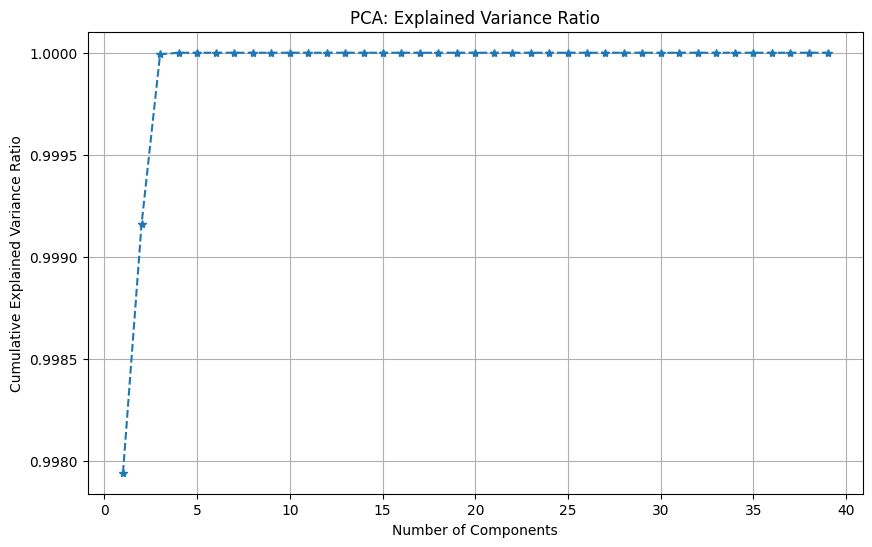

In [ ]:
from sklearn.decomposition import PCA

# # Assuming 'X' contains your features
# pca = PCA(n_components= 23)
# pca.fit(X_train)

#Assuming 'X' contains your features
pca = PCA()
pca.fit(X_trainResampled)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker='*', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA: Explained Variance Ratio')
plt.grid(True)
plt.show()

In [ ]:
#apply the optimal n_components to a new pca.
#keeping it as point of inflection is causing certain models to underfit

components = 10

pca = PCA(n_components= components)

X_train_pca = pca.fit_transform(X_trainResampled)   #resampled and pca both done.
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)

In [ ]:
X_val_pca

array([[ 1.03274723e+04, -3.44488344e+00, -8.45366021e+01, ...,
         3.20227124e-01, -6.42817644e-02, -2.67554451e-02],
       [-1.34256003e+03, -2.69916613e+00, -8.30106485e+01, ...,
         9.10711111e-01, -1.35533428e-01,  3.17289376e-01],
       [-1.34256003e+03, -2.69916613e+00, -8.30106485e+01, ...,
         9.10711111e-01, -1.35533428e-01,  3.17289376e-01],
       ...,
       [-1.34256003e+03, -2.69916613e+00, -8.30106485e+01, ...,
         9.10711111e-01, -1.35533428e-01,  3.17289376e-01],
       [-1.34256003e+03, -2.69916611e+00, -8.30106477e+01, ...,
         9.10448560e-01, -1.34020179e-01,  3.11340344e-01],
       [-1.34255988e+03, -3.74495748e+00, -8.29517484e+01, ...,
         2.01750329e+00,  7.18169653e-02,  1.90300446e-01]])

### ***Model Training, Validation and Evaluation.***

Now, using that are robust to outliers might be preferred to ensure that the system can detect both normal and abnormal connections effectively.

The models we are going to use are:

**Logistic Regression**

**XGBoost**

**Decision Tree Classifier**

**Naive Bayes**

**Random Forest**

**K-Nearest Neighbors**

**SVM**



In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score


def model_eval(model,X_train, y_train, X_val, y_val, X_test, y_test):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

    print(f"ROC AUC: {scores.mean():.4f} (+/- {scores.std():.4f})\n")

    #calculate training accuracy
    trainPred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, trainPred)
    print(f"\nThe training accuracy of the model will be: {np.round(accuracy_score(y_train, trainPred), 3)*100}%\n")

    #calculate validation accuracy
    valPred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, valPred)
    print(f"The validation accuracy of the model will be: {np.round(accuracy_score(y_val, valPred), 3)*100}%\n")

    testPred = model.predict(X_test)

    model_name = type(model).__name__

    print(f"{model_name} testing report on unseen data")
    print(classification_report(y_test, testPred))
    print("The confusion matrix will be: \n")
    print(confusion_matrix(y_test, testPred))
    print(f"The ROC-AUC score on the testing data will be: {np.round(roc_auc_score(y_test, testPred), 3)}\n")


    fpr, tpr, thresholds = roc_curve(y_test, testPred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    print(f"\nThe testing accuracy of the model on unseen data will be: {np.round(accuracy_score(y_test, testPred), 3)*100}%\n")

ROC AUC: 0.9898 (+/- 0.0002)


The training accuracy of the model will be: 98.7%

The validation accuracy of the model will be: 97.6%

LogisticRegression testing report on unseen data
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     59404
           1       0.94      0.99      0.96     14699

    accuracy                           0.99     74103
   macro avg       0.97      0.99      0.98     74103
weighted avg       0.99      0.99      0.99     74103

The confusion matrix will be: 

[[58443   961]
 [  127 14572]]
The ROC-AUC score on the testing data will be: 0.988


The testing accuracy of the model on unseen data will be: 98.5%



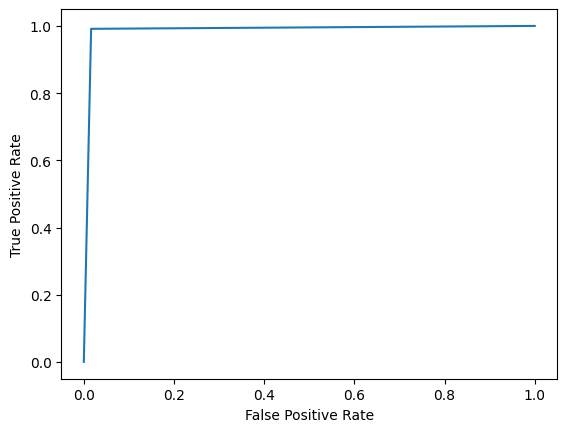

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression

# Calculate class weights for imbalance handling
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Initialize and train Logistic Regression model with class weights and L2 regularization
lrL2 = LogisticRegression(penalty='l2', C=1.0, class_weight=dict(enumerate(class_weights)), random_state=42, multi_class= "multinomial")
lrL2.fit(X_train_pca, y_trainResampled)

model_eval(lrL2, X_train_pca, y_trainResampled, X_val_pca, y_val, X_test_pca, y_test)


ROC AUC: 0.9997 (+/- 0.0001)


The training accuracy of the model will be: 100.0%

The validation accuracy of the model will be: 99.9%

XGBClassifier testing report on unseen data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59404
           1       1.00      1.00      1.00     14699

    accuracy                           1.00     74103
   macro avg       1.00      1.00      1.00     74103
weighted avg       1.00      1.00      1.00     74103

The confusion matrix will be: 

[[59389    15]
 [    9 14690]]
The ROC-AUC score on the testing data will be: 1.0


The testing accuracy of the model on unseen data will be: 100.0%



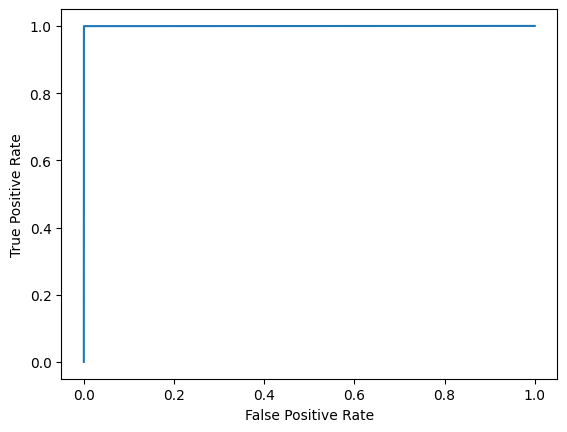

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:hinge", random_state=42)
xgb_model.fit(X_train_pca, y_trainResampled)

model_eval(xgb_model, X_train_pca, y_trainResampled, X_val_pca, y_val, X_test_pca, y_test)

ROC AUC: 0.9995 (+/- 0.0002)


The training accuracy of the model will be: 100.0%

The validation accuracy of the model will be: 99.8%

DecisionTreeClassifier testing report on unseen data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59404
           1       1.00      1.00      1.00     14699

    accuracy                           1.00     74103
   macro avg       1.00      1.00      1.00     74103
weighted avg       1.00      1.00      1.00     74103

The confusion matrix will be: 

[[59370    34]
 [   27 14672]]
The ROC-AUC score on the testing data will be: 0.999


The testing accuracy of the model on unseen data will be: 99.9%



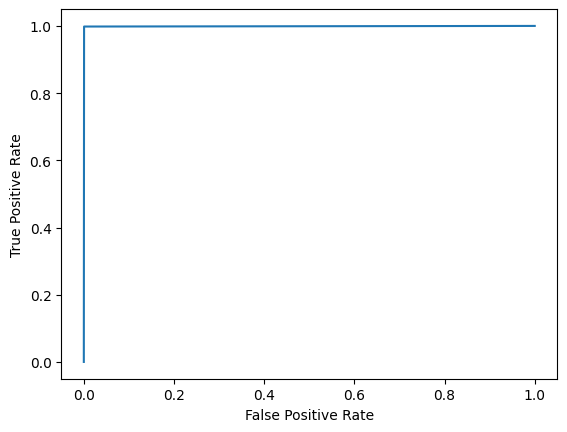

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train_pca, y_trainResampled)

model_eval(dtc, X_train_pca, y_trainResampled, X_val_pca, y_val, X_test_pca, y_test)

ROC AUC: 0.9778 (+/- 0.0008)


The training accuracy of the model will be: 95.39999999999999%

The validation accuracy of the model will be: 97.1%

BernoulliNB testing report on unseen data
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     59404
           1       0.88      0.98      0.93     14699

    accuracy                           0.97     74103
   macro avg       0.94      0.97      0.96     74103
weighted avg       0.97      0.97      0.97     74103

The confusion matrix will be: 

[[57485  1919]
 [  275 14424]]
The ROC-AUC score on the testing data will be: 0.974


The testing accuracy of the model on unseen data will be: 97.0%



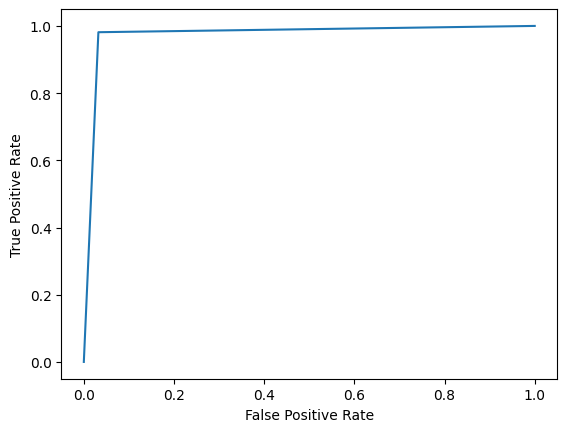

In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train_pca, y_trainResampled)

model_eval(BNB_Classifier, X_train_pca, y_trainResampled, X_val_pca, y_val, X_test_pca, y_test)

ROC AUC: 1.0000 (+/- 0.0000)


The training accuracy of the model will be: 100.0%

The validation accuracy of the model will be: 99.8%

RandomForestClassifier testing report on unseen data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59404
           1       1.00      1.00      1.00     14699

    accuracy                           1.00     74103
   macro avg       1.00      1.00      1.00     74103
weighted avg       1.00      1.00      1.00     74103

The confusion matrix will be: 

[[59383    21]
 [    9 14690]]
The ROC-AUC score on the testing data will be: 1.0


The testing accuracy of the model on unseen data will be: 100.0%



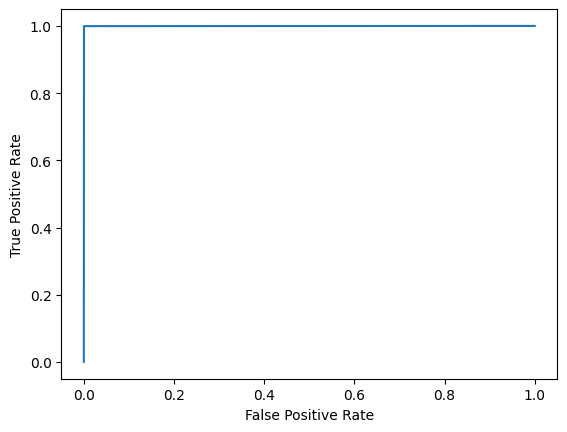

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfcFinal = RandomForestClassifier(n_jobs= -1, n_estimators= 15, criterion= "entropy")
rfcFinal.fit(X_train_pca, y_trainResampled)

model_eval(rfcFinal, X_train_pca, y_trainResampled, X_val_pca, y_val, X_test_pca, y_test)

ROC AUC: 0.9790 (+/- 0.0275)


The training accuracy of the model will be: 98.8%

The validation accuracy of the model will be: 98.6%

LinearSVC testing report on unseen data
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     59404
           1       0.94      0.99      0.97     14699

    accuracy                           0.99     74103
   macro avg       0.97      0.99      0.98     74103
weighted avg       0.99      0.99      0.99     74103

The confusion matrix will be: 

[[58491   913]
 [  140 14559]]
The ROC-AUC score on the testing data will be: 0.988


The testing accuracy of the model on unseen data will be: 98.6%



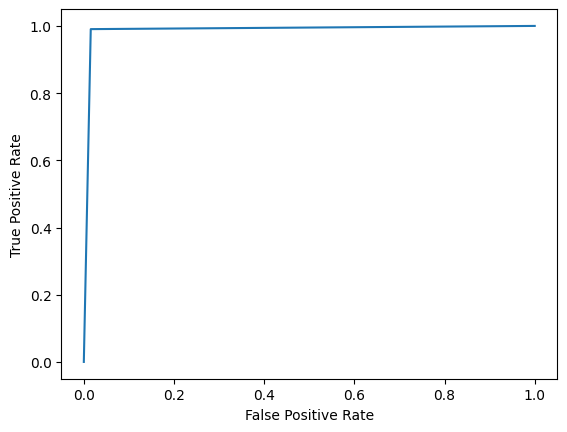

In [ ]:
from sklearn.svm import LinearSVC

newSVM = LinearSVC()
newSVM.fit(X_train_pca, y_trainResampled)

model_eval(newSVM, X_train_pca, y_trainResampled, X_val_pca, y_val, X_test_pca, y_test)

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train_pca, y_trainResampled)

# model_eval(knn, X_train_pca, y_trainResampled, X_val_pca, y_val, X_test_pca, y_test)